/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1000/1000 - 4s - 4ms/step - accuracy: 0.7831 - loss: 0.4783 - val_accuracy: 0.9155 - val_loss: 0.2351
Epoch 2/50
1000/1000 - 2s - 2ms/step - accuracy: 0.9300 - loss: 0.1835 - val_accuracy: 0.9872 - val_loss: 0.0842
Epoch 3/50
1000/1000 - 2s - 2ms/step - accuracy: 0.9608 - loss: 0.1053 - val_accuracy: 0.9846 - val_loss: 0.0511
Epoch 4/50
1000/1000 - 2s - 2ms/step - accuracy: 0.9715 - loss: 0.0770 - val_accuracy: 0.9896 - val_loss: 0.0378
Epoch 5/50
1000/1000 - 2s - 2ms/step - accuracy: 0.9764 - loss: 0.0637 - val_accuracy: 0.9722 - val_loss: 0.0657
Epoch 6/50
1000/1000 - 2s - 2ms/step - accuracy: 0.9787 - loss: 0.0569 - val_accuracy: 0.9930 - val_loss: 0.0251
Epoch 7/50
1000/1000 - 2s - 2ms/step - accuracy: 0.9812 - loss: 0.0517 - val_accuracy: 0.9923 - val_loss: 0.0235
Epoch 8/50
1000/1000 - 2s - 2ms/step - accuracy: 0.9828 - loss: 0.0478 - val_accuracy: 0.9925 - val_loss: 0.0258
Epoch 9/50
1000/1000 - 2s - 2ms/step - accuracy: 0.9828 - loss: 0.0481 - val_accuracy: 0.9949 - 

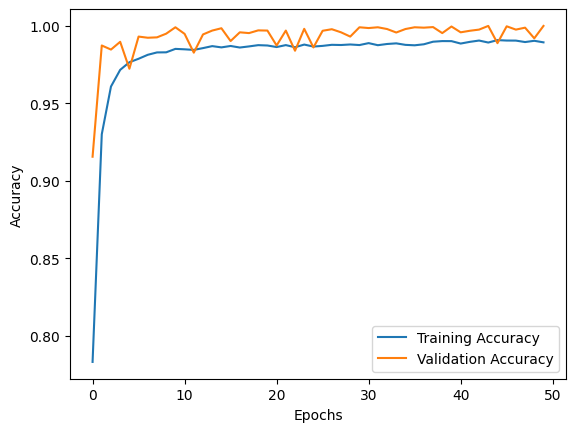

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/elephant-data2/elephant_health_status_dataset.csv'
data = pd.read_csv(file_path)

# Data preprocessing
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Ensure columns are numeric
for col in ['ElephantHeartbeat', 'BloodOxygen', 'BodyTemperature']:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Coerce invalid entries to NaN

# Drop rows with NaN values (if any)
data = data.dropna()

# Encode the target variable
label_encoder = LabelEncoder()
data['HealthStatus'] = label_encoder.fit_transform(data['HealthStatus'])

# Separate features and labels
X = data[['ElephantHeartbeat', 'BloodOxygen', 'BodyTemperature']]
y = data['HealthStatus']

# Standardize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert labels to categorical
y = to_categorical(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the FCNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Save the model for future use
model.save('/kaggle/working/elephant_health_model.h5')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
import numpy as np

# Function to preprocess and predict manual inputs
def predict_manual_input(model, scaler, label_encoder):
    print("\nEnter the biometric data for the elephant:")
    
    try:
        # Get manual input for features
        heartbeat = float(input("Elephant Heartbeat: "))
        blood_oxygen = float(input("Blood Oxygen: "))
        body_temperature = float(input("Body Temperature: "))
    except ValueError:
        print("Invalid input! Please enter numeric values.")
        return

    # Prepare input data as a numpy array
    input_data = np.array([[heartbeat, blood_oxygen, body_temperature]])

    # Standardize the input data
    input_data = scaler.transform(input_data)

    # Predict using the trained model
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])

    # Display the result
    print(f"\nPredicted Health Status: {predicted_label[0]}")
    print(f"Prediction Confidence: {prediction[0][predicted_class] * 100:.2f}%")

# Test the model with manual inputs
predict_manual_input(model, scaler, label_encoder)



Enter the biometric data for the elephant:


Elephant Heartbeat:  36.26
Blood Oxygen:  92
Body Temperature:  36.05


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Predicted Health Status: Critical
Prediction Confidence: 100.00%


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
